In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cvxopt import matrix, solvers
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris["data"], iris["target"]],
                       columns=iris["feature_names"] + ["target"])

In [2]:
# Retain only 2 linearly separable classes
iris_df = iris_df[iris_df["target"].isin([0, 1])]
iris_df["target"] = iris_df["target"].replace(0, -1)

# Select only 2 attributes
iris_df = iris_df[["petal length (cm)", "petal width (cm)", "target"]]
iris_df.head()


,petal length (cm),petal width (cm),target
0,1.4,0.2,-1.0
1,1.4,0.2,-1.0
2,1.3,0.2,-1.0
3,1.5,0.2,-1.0
4,1.4,0.2,-1.0


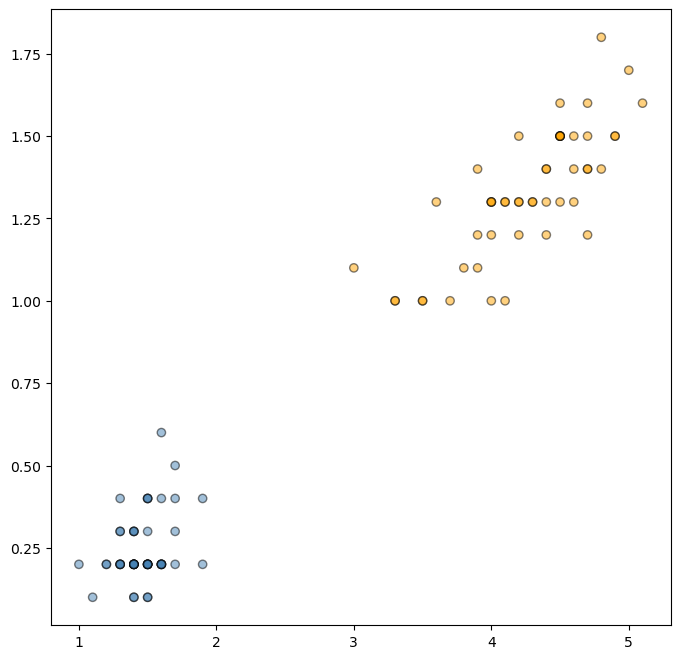

In [3]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()

plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5,
            cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.show()


In [4]:
n = X.shape[0]
H = np.dot(y * X, (y * X).T)
q = -np.ones((n, 1))
A = y.reshape(1, -1)
b = np.array([0.0])
G = -np.eye(n)
h = np.zeros(n)
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])


     pcost       dcost       gap    pres   dres
 0: -5.8693e+00 -1.1241e+01  3e+02  1e+01  2e+00
 1: -5.9277e+00 -3.6988e+00  4e+01  2e+00  3e-01
 2: -1.0647e+00 -1.9434e+00  5e+00  2e-01  2e-02
 3: -6.5979e-01 -1.1956e+00  6e-01  6e-03  8e-04
 4: -8.3813e-01 -1.2988e+00  5e-01  3e-03  4e-04
 5: -1.1588e+00 -1.1784e+00  2e-02  8e-05  1e-05
 6: -1.1763e+00 -1.1765e+00  2e-04  8e-07  1e-07
 7: -1.1765e+00 -1.1765e+00  2e-06  8e-09  1e-09
 8: -1.1765e+00 -1.1765e+00  2e-08  8e-11  1e-11
Optimal solution found.


In [5]:
w = np.dot((y * alphas).T, X).reshape(-1)
S = (alphas > 1e-5).flatten()
b = np.mean(y[S] - np.dot(X[S], w.reshape(-1, 1)))


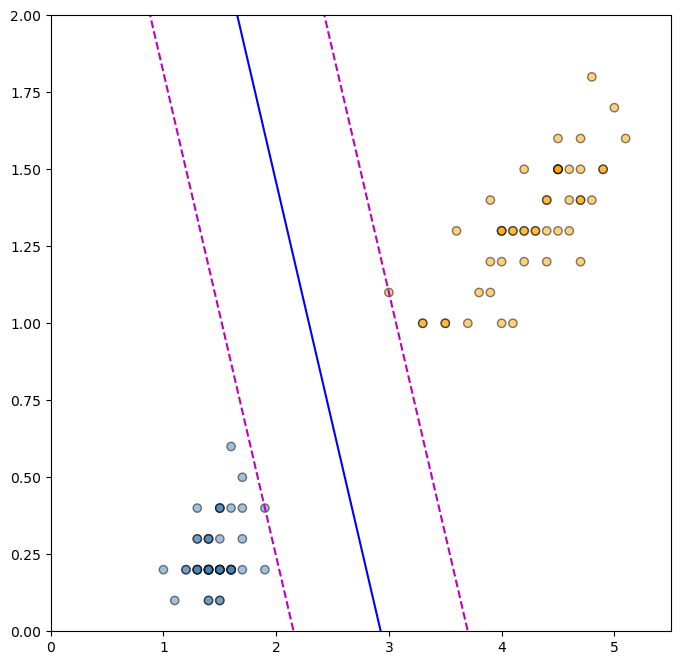

In [6]:
x_min, x_max = 0, 5.5
y_min, y_max = 0, 2
xx = np.linspace(x_min, x_max)
a = -w[0] / w[1]
yy = a * xx - (b) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_neg = yy - np.sqrt(1 + a ** 2) * margin
yy_pos = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5,
            cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
